In [7]:
import pandas as pd

In [8]:
df = pd.read_csv(r"C:\Users\Admin\Downloads\wcp\worldcities.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Admin\\Downloads\\wcp\\worldcities.csv'

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.isna().sum()

In [ ]:
df.dropna(subset=['population'])

In [ ]:
df.head()

In [9]:
df.isna().sum()

city              0
city_ascii        1
lat               0
lng               0
country           0
iso2             33
iso3              0
admin_name      201
capital       32919
population      251
id                0
dtype: int64

In [10]:
# 1. fill missing value in city_ascii
df['city_ascii'] = df['city_ascii'].fillna(df['city'])

In [11]:
# recheck isna
df.isna().sum()

city              0
city_ascii        0
lat               0
lng               0
country           0
iso2             33
iso3              0
admin_name      201
capital       32919
population      251
id                0
dtype: int64

In [12]:
# 2. missing admin_name with 'unknown'
df['admin_name'] = df['admin_name'].fillna('unknown')

In [13]:
# recheck isna
df.isna().sum()

city              0
city_ascii        0
lat               0
lng               0
country           0
iso2             33
iso3              0
admin_name        0
capital       32919
population      251
id                0
dtype: int64

In [14]:
# 3. dropna from population
df = df.dropna(subset=['population'])

In [15]:
df.isna().sum()

city              0
city_ascii        0
lat               0
lng               0
country           0
iso2             33
iso3              0
admin_name        0
capital       32879
population        0
id                0
dtype: int64

In [16]:
df['capital'].fillna('0', inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6780\3074219605.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['capital'].fillna('0', inplace=True)


In [17]:
df.to_csv(r'C:\Users\Admin\Downloads\wcp\cleaned_dataset.csv', index=False)

In [18]:
# Basic Visualization

import matplotlib.pyplot as plt
import seaborn as sns

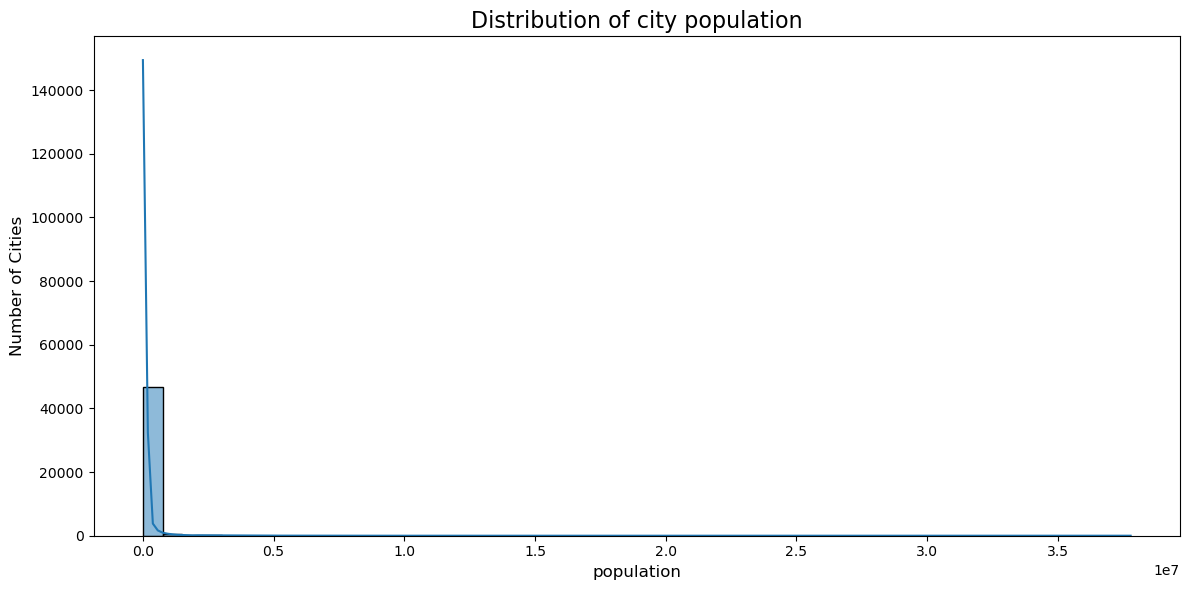

In [19]:
# Population distribution of cities
plt.figure(figsize=(12,6))
sns.histplot(df['population'], bins=50, kde=True)
plt.title('Distribution of city population', fontsize=16)
plt.xlabel('population', fontsize=12)
plt.ylabel('Number of Cities', fontsize=12)
plt.tight_layout()
plt.show()

In [20]:
# sort the df 
top_cities = df.sort_values(by= 'population', ascending=False).head(20)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6780\1083023490.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cities, x='population', y='city', palette='viridis')


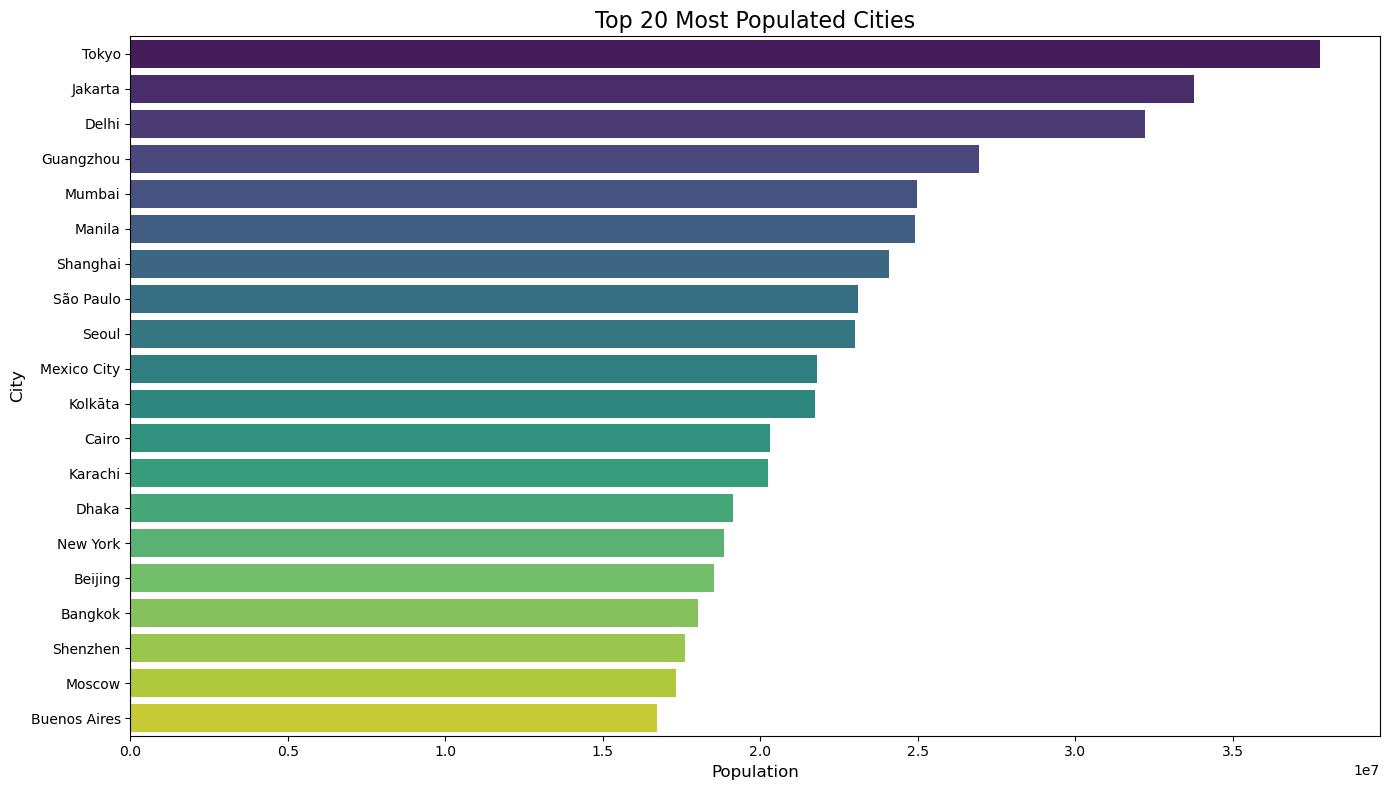

In [21]:
plt.figure(figsize=(14, 8))
sns.barplot(data=top_cities, x='population', y='city', palette='viridis')
plt.title('Top 20 Most Populated Cities', fontsize=16)
plt.xlabel('Population', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_6780\313165780.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_population.sort_values('population', ascending=False).head(20), x='population', y='country', palette='viridis')


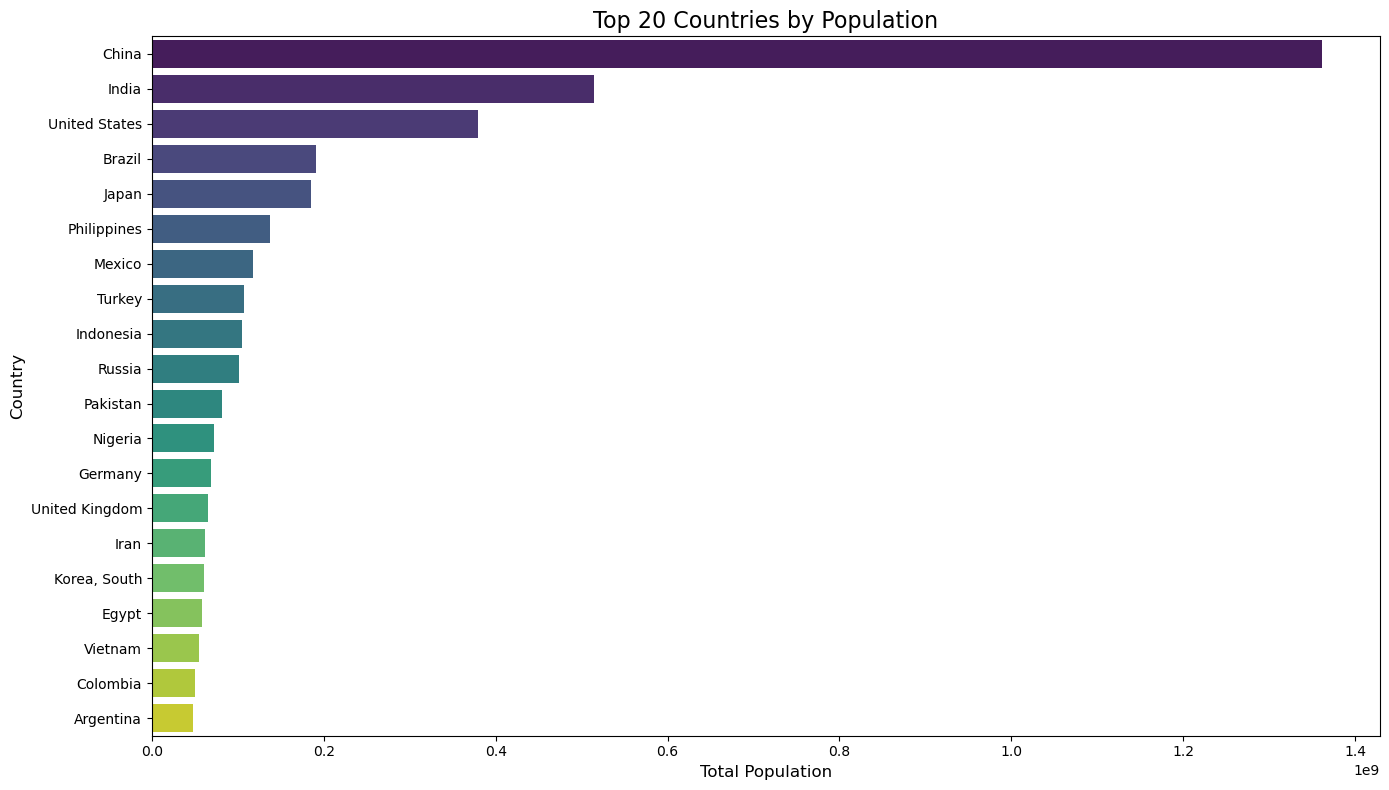

In [27]:
country_population = df.groupby('country')['population'].sum().reset_index()
plt.figure(figsize=(14, 8))
sns.barplot(data=country_population.sort_values('population', ascending=False).head(20), x='population', y='country', palette='viridis')
plt.title('Top 20 Countries by Population', fontsize=16)
plt.xlabel('Total Population', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.tight_layout()
plt.show()